2019-01-06 Marco Barbosa  
Testing the poly1d function for finding root of a 1d polynomial.

---

Numpy implements a function which returns a 1D polynome object, poly1d. Its usage is very simple, as shown below!

Let's start by finding the roots of $x^2-1=0$.

In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
f = np.poly1d([1,0,-1])    # returns a function which calculates all (?) roots of a polynomial.  

print('Equation: \n',f, '\n\nhas roots: \n', f.roots)

Equation: 
    2
1 x - 1 

has roots: 
 [ 1. -1.]


In [59]:
f.variable

'x'

In [61]:
f(0), f(-1), f(1)    # calculating values at specific points

(-1, 0, 0)

Now, let us use it for investigate something a little bit more interesting... 
Here I picked up the equation for a lattice gas on the triangular lattice in the approximation of a Husimi cactus... It is too much specific. It has a fifth order polynomial equation of state (I am working on this system right now...).

For educational purposes it should be more interesting to test using the van der waals equation (try to work on that latter).

In [41]:
p = dict( kT=0.5, ep=0.0, ept=0.0, mu=-1.0)   # Dictionary of parameters

q = lambda par = p: np.exp(par['ep']/(2.0*par['kT']))        # edges are are shared between 2 triangles
r = lambda par = p: np.exp(par['ept']/par['kT'])
s = lambda par = p: np.exp(par['mu']/(6.0*par['kT']))        # vertexes between six triangles

make_eos = lambda par = p: np.poly1d( [ -q(par)*s(par)**2, \
                 + q(par)**3*r(par)*s(par)**3, \
                 -2*s(par)**2, \
                +2*q(par)*s(par)**2, \
                -1, \
                s(par) ])

f = make_eos(p)


Plotting the polynomial expression as a function of x.

In [43]:
x = np.linspace(-5.0,5.0,100)
y = f(x)

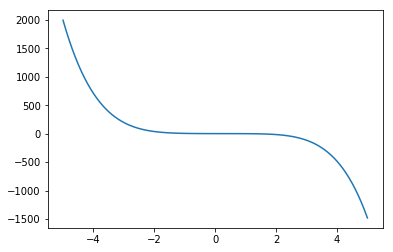

In [44]:
plt.plot(x,y)

Finding the roots (and visually confirming their location).

In [34]:
all_roots = f.roots
real_roots = [ x.real for x in all_roots if np.isreal(x)]

print('All: ', all_roots, '\n')
print('Real:', real_roots, '\n')

All:  [-0.40984282+1.20351669j -0.40984282-1.20351669j  0.35903456+0.96249618j
  0.35903456-0.96249618j  0.81814782+0.j        ] 

Real: [0.8181478207616959] 



In [35]:
f

poly1d([-0.51341712,  0.36787944, -1.02683424,  1.02683424, -1.        ,
        0.71653131])

In [36]:
p

{'kT': 0.5, 'ep': 0.0, 'ept': 0.0, 'mu': -1.0}

In [38]:
p['kT']=0.1

In [39]:
f

poly1d([-0.51341712,  0.36787944, -1.02683424,  1.02683424, -1.        ,
        0.71653131])

In [49]:
x2dens = lambda x: x**3/(1.0+x**3)
x2dens(xr)


0.35385499220635286